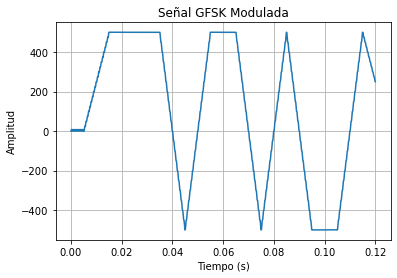

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gfsk_signal(bits, carrier_freq, sampling_rate, bit_duration, modulation_index, gaussian_beta):
    num_samples_per_bit = int(bit_duration * sampling_rate)
    t = np.linspace(0, bit_duration, num_samples_per_bit, endpoint=False)
    carrier_signal = np.sin(2 * np.pi * carrier_freq * t)
    
    gfsk_signal = []
    prev_phase = 0
    for bit in bits:
        if bit == 1:
            phase_shift =  np.pi * modulation_index
        else:
            phase_shift = -np.pi * modulation_index
        
        phase_change = phase_shift - prev_phase
        phase_modulated = np.sin(2 * np.pi * carrier_freq * t + phase_change)
        
        gfsk_signal.extend(phase_modulated * carrier_signal)
        
        prev_phase = phase_shift
    
    # Apply Gaussian filtering
    gaussian_filter = np.exp(-gaussian_beta * t**2)
    gfsk_signal = np.convolve(gfsk_signal, gaussian_filter, mode='same')
    
    return np.array(gfsk_signal)

# Parámetros de la señal
carrier_freq = 1000         # Frecuencia de la portadora en Hz
bit_duration = 0.01         # Duración de un bit en segundos
sampling_rate = 100e3       # Tasa de muestreo en muestras por segundo
modulation_index = 0.5      # Índice de modulación
gaussian_beta = 0.3         # Parámetro beta para la función gaussiana

# Mensaje a modular (en binario)
message = '111100011011'

# Convertir el mensaje a una lista de bits
bits = [int(bit) for bit in message]

# Generar la señal GFSK modulada
gfsk_signal = generate_gfsk_signal(bits, carrier_freq, sampling_rate, bit_duration, modulation_index, gaussian_beta)

# Graficar la señal modulada GFSK
time = np.linspace(0, len(gfsk_signal) / sampling_rate, len(gfsk_signal))
plt.plot(time, gfsk_signal)
plt.title('Señal GFSK Modulada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()
